*For Part 2 of the problem, we are going to use insurance dataset where the main aim of the use case is to predict the insurance charges/premium for a person based on certain criteria. The dataset is explained below:*

Columns:
age : The age of the person

sex: gender (male/female)

bmi: Body mass index

region: the beneficiary's residential address in the United States, northeast, southeast, southwest, northwest.

children: Number of children covered by health insurance / Number of dependents

smoker: Smoker (yes/no)

charges : Insurance charges

In [32]:
#Lets import all the necessary packages
sns.set(style='whitegrid')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [80]:
#read our insurance data as a pandas data frame
df = pd.read_csv("./insurance.csv")
print("\n The shape of the dataframe is " , df.shape)
print("\n The columns that are present in the dataframe" , df.columns)
print("\n The first five rows of the dataframe :" )
df.head(5)


 The shape of the dataframe is  (1338, 7)

 The columns that are present in the dataframe Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

 The first five rows of the dataframe :


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Question A:
1. How much data is present ?
Answer : The dataset consists of 1338 rows and 7 columns in total.
2. What attributes/features are continuous valued? Answer : The features ['age','bmi', 'charges'] are continuous valued.
3. Which attributes are categorical? : Answer : The features [ 'sex', 'children', 'smoker', 'region'] are categorical values

In [30]:
#helper function for continuous columns
def draw_plot_univariate_cont(column):
  print(f"Statistical summary of {column}:\n\n",df[column].describe())
  print("---------------------------------")
  print("Missing values: %f\n" % df[column].isnull().sum())
  print("Mean: %f\n" % df[column].mean())
  print("Median: %f \n" % df[column].median())
  print("Skewness: %f\n" % df[column].skew())
  print("Kurtosis: %f\n" % df[column].kurt())
  print("---------------------------------")
  sns.histplot(df[str(column)],kde="True",color = 'c')

Question B : Answer
1. Visualization and summary statisitcs is printed below for each column along with the kind of special treatment they require.

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.fillna(df.mean,inplace=True)

Statistical summary of charges:

 count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 13270.422265

Median: 9382.033000 

Skewness: 1.515880

Kurtosis: 1.606299

---------------------------------


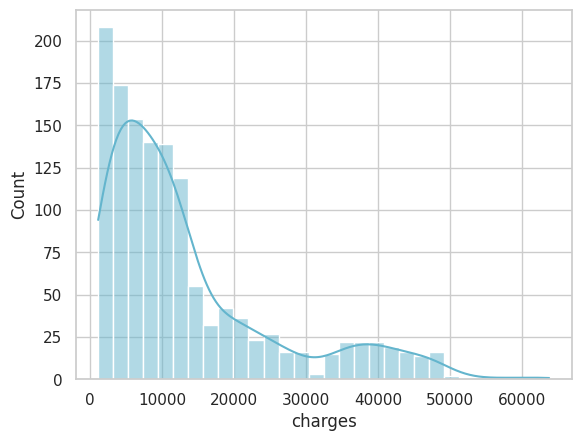

In [33]:
#charges
draw_plot_univariate_cont("charges")

Question B : The distribution of [charges] is positively skewed, meaning the median would slightly be less than the mean. There are no missing values. One can standardize or normalize the data at the cost of interpretability(target column).
Logarithmic Transformation may make the distribution more normal.

<Axes: xlabel='charges', ylabel='Count'>

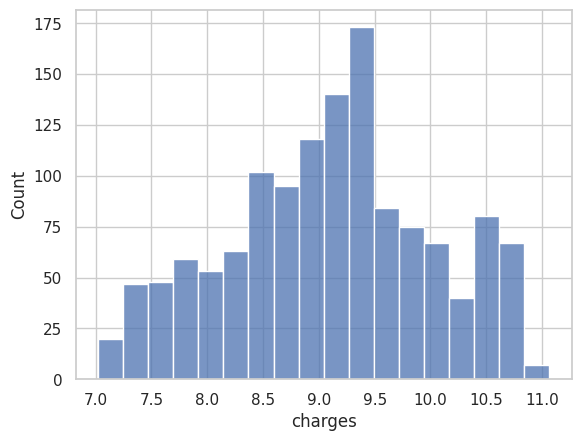

In [34]:
#log transformation of charges feature
sns.histplot(np.log(df["charges"]))

Statistical summary of bmi:

 count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 30.663397

Median: 30.400000 

Skewness: 0.284047

Kurtosis: -0.050732

---------------------------------


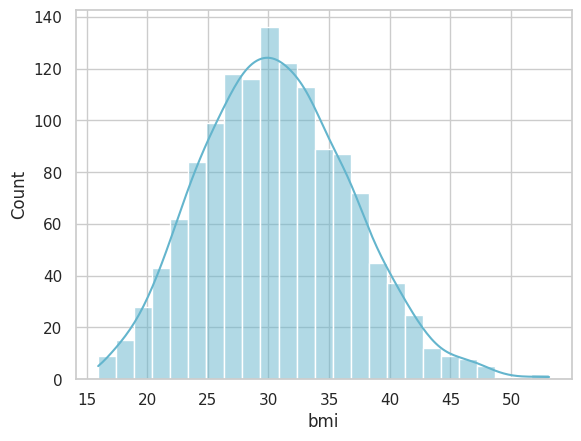

In [35]:
#bmi
draw_plot_univariate_cont("bmi")

Question B: In the feature [bmi] , there are no missing values, and the distribution is skewed positive with skewness value of0.28.

Statistical summary of age:

 count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 39.207025

Median: 39.000000 

Skewness: 0.055673

Kurtosis: -1.245088

---------------------------------


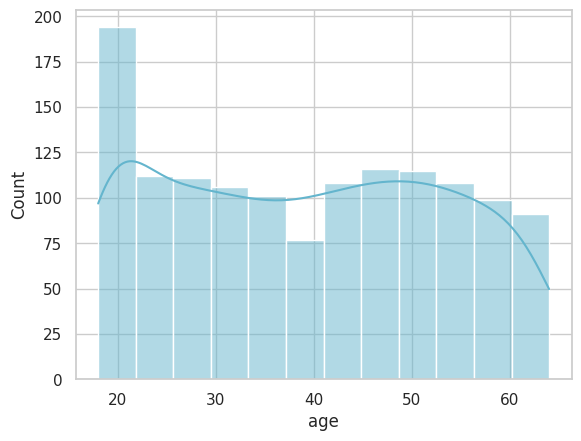

In [36]:
#age
draw_plot_univariate_cont("age")

Question B: In the feature [age], there are 0 missing values. The max age is 64 whereas the min age is 18.

In [15]:
def draw_plot_univariate_cat(column,fig_x,fig_y):
  print(f"Statistical summary of {column}:\n\n",df[column].describe(include='object'))
  print("---------------------------------")
  print("Missing values: %f\n" % df[column].isnull().sum())
  print("---------------------------------")
  print("Count")
  print("---------------------------------")
  print(df[column].value_counts())
  print("---------------------------------")
  plt.figure(figsize=(fig_x,fig_y))
  ax = sns.countplot(x=column, data=df)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.show()

Statistical summary of sex:

 count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
male      676
female    662
Name: sex, dtype: int64
---------------------------------


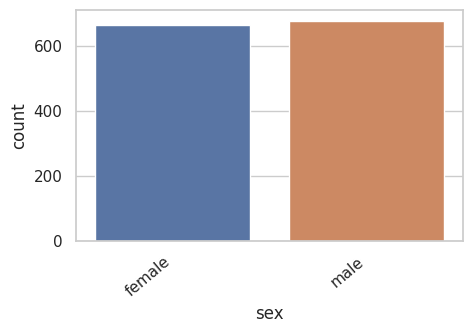

In [37]:
#sex
draw_plot_univariate_cat("sex",5,3)

Question B : In the ["sex"] feature there are no missing values. The distribution of both male and female is almost the same. These categorical values should be converted into numerical values. I would preferrably use one hot encoding.

Statistical summary of children:

 count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
---------------------------------


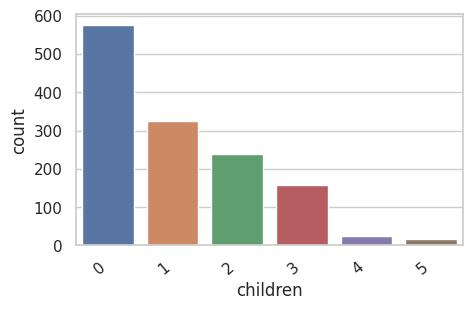

In [38]:
#children
draw_plot_univariate_cat("children",5,3)

Question B : Unlike sex feature. the children feature has varied imbalance feature distribution. People without children under coverage is significantly more than people with 3 to 5 children. A stratified split is mandatory to make sure than we chose test and train in equal proportions.

Statistical summary of smoker:

 count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
---------------------------------


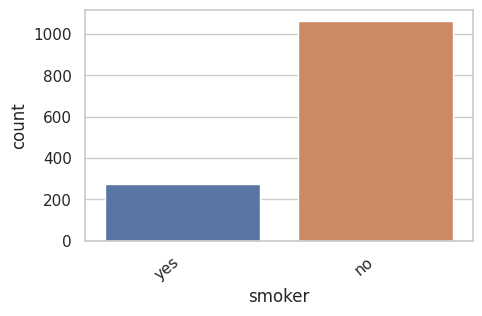

In [39]:
#smoker
draw_plot_univariate_cat("smoker",5,3)

Question B : Again, the smoker column is highly imbalanced.We can either perform resampling of data or data augmentation to make sure we have equal number of samples

Statistical summary of region:

 count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
---------------------------------


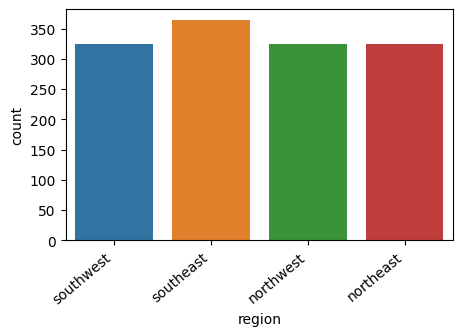

In [28]:
#region
draw_plot_univariate_cat("region",5,3)

Question B : The region column is fairly balanced across all values

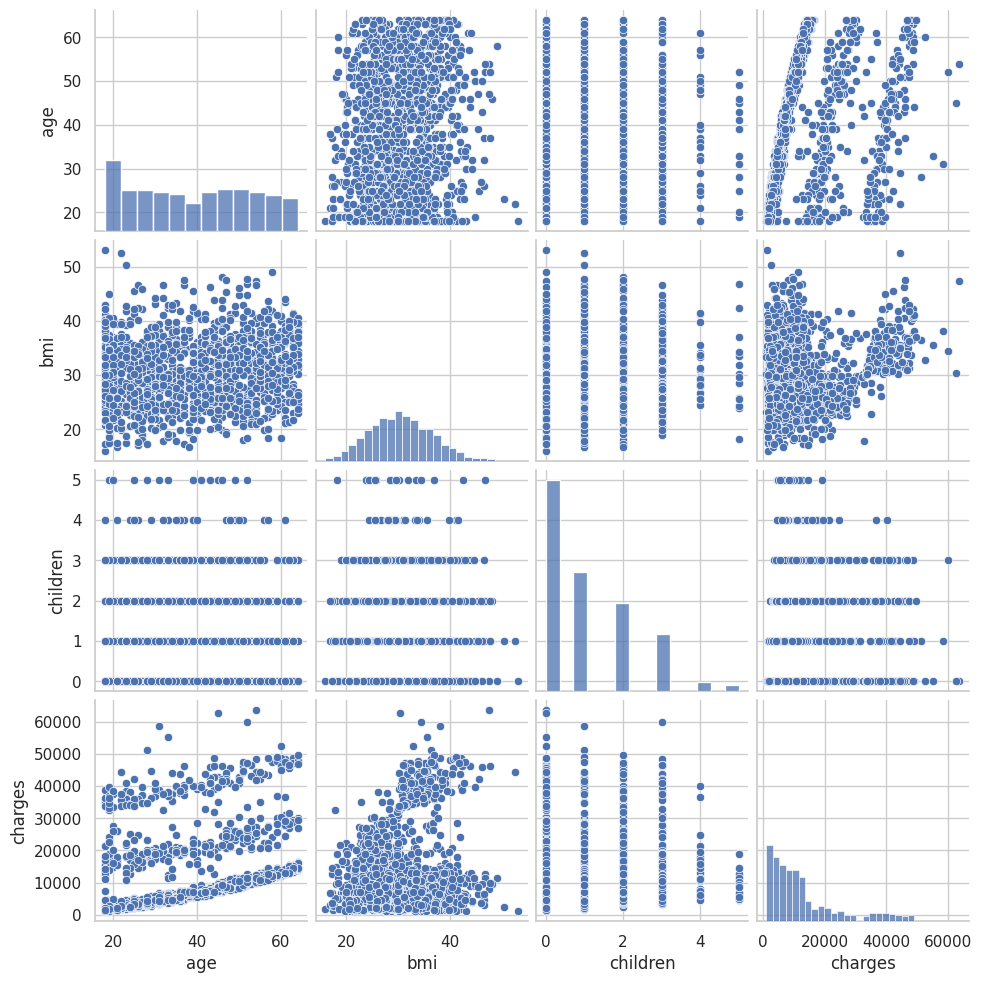

In [40]:
#scatter plot between features
sns.pairplot(data=df)

C :Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [5 points]

<Axes: >

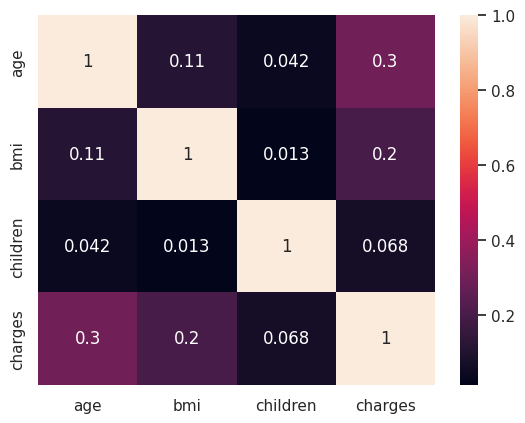

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [42]:
corr_matrix = df.corr(method="pearson",numeric_only = True)
corr_matrix["charges"].sort_values(ascending = False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Question C:
charges vs Rest:
 it is clear that[charges] has slight positive correlation with age. That is the value of charges increases with increase in a person age which intuitively makes sense. Additionally, small correlation with BMI and close to zero correlation with children.

<Axes: xlabel='age', ylabel='charges'>

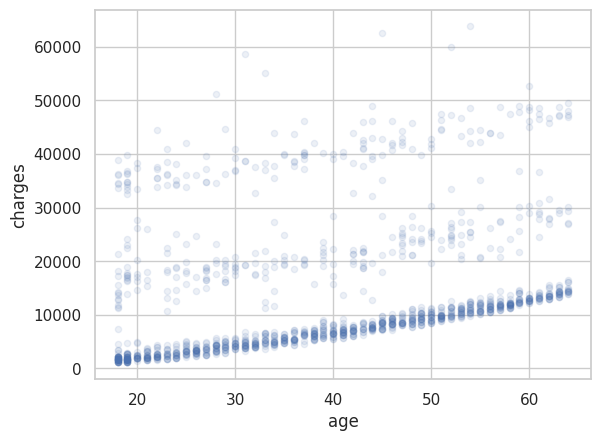

In [46]:
#lets take a closer look at charges vs age
df.plot(kind="scatter", x="age", y="charges",alpha=0.1, grid=True)

There is positive trend in the graph, apart from some vertical lines which cannot be discarded as outliers. Some kind of transformation would help us make it more linearly dense.

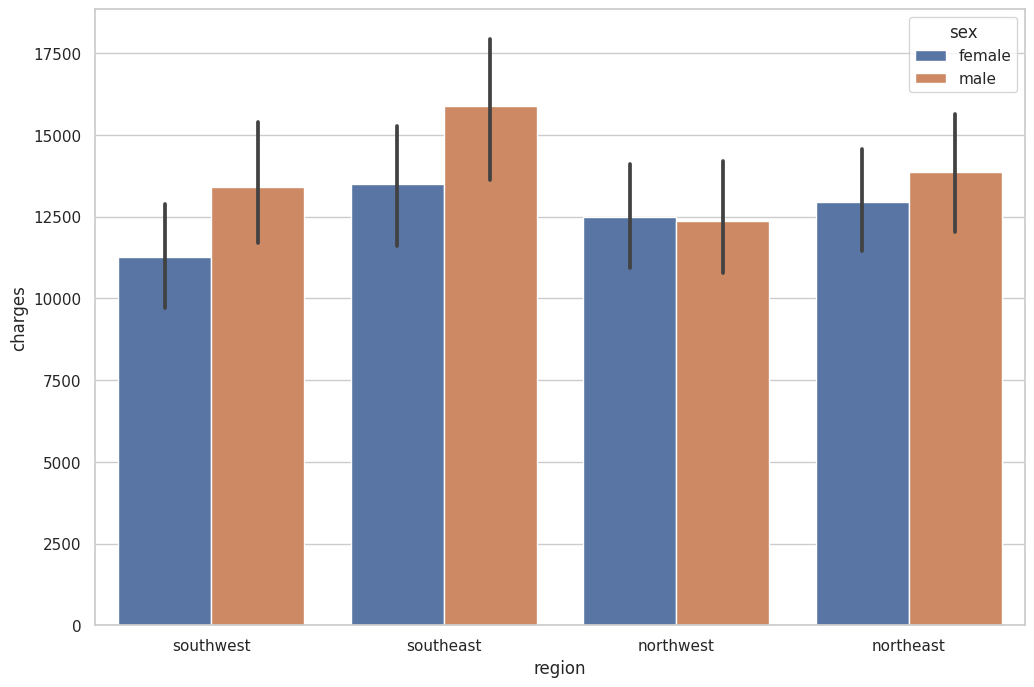

In [53]:
#categorical vs continuous graphs
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df)

The charges overall look the same in all the regions irrespective of gender

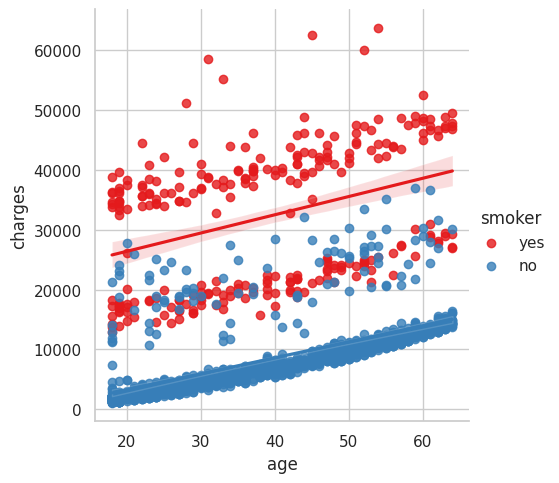

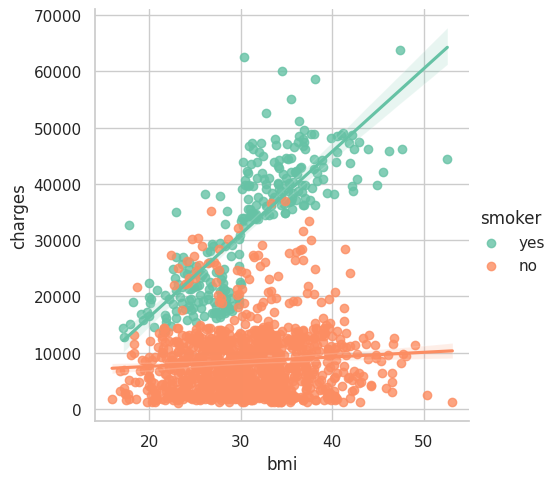

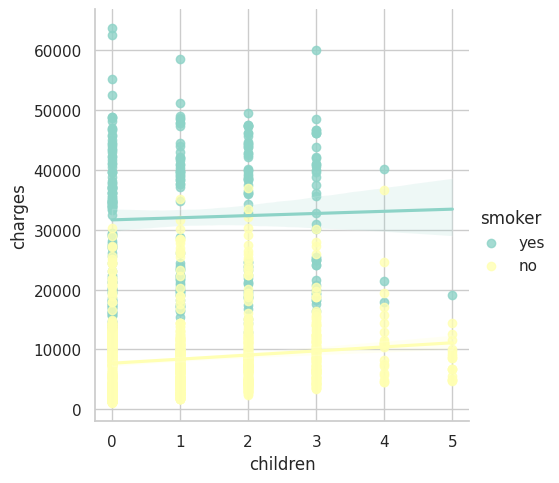

In [54]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<Axes: xlabel='charges', ylabel='Density'>

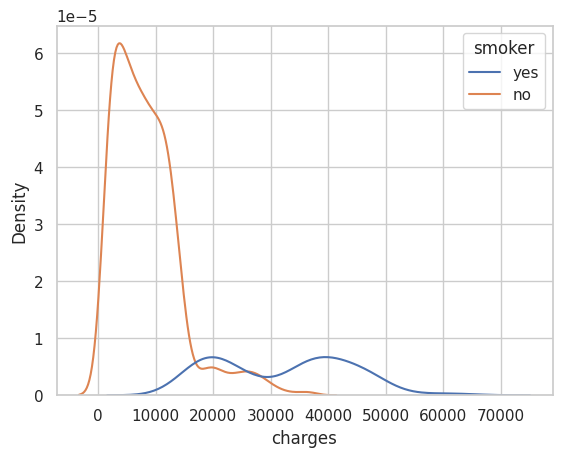

In [56]:
sns.kdeplot(df,x = "charges",hue = "smoker")

It is absolutely clear that smokers always have to pay higher charges from the above graphs. Hence, it is one of the most important columns to determine the insurance charges of a person.

<Axes: xlabel='charges', ylabel='Density'>

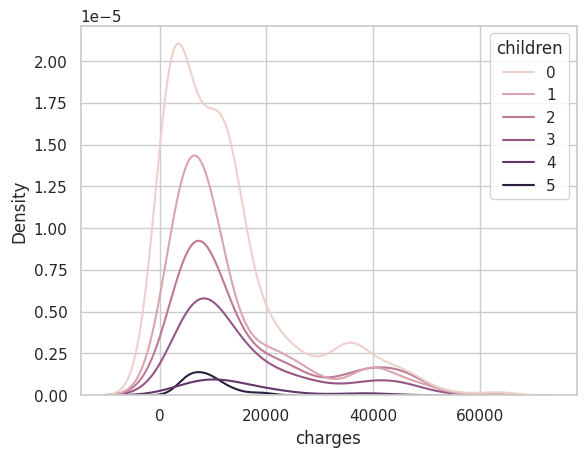

In [57]:
sns.kdeplot(df,x = "charges",hue = "children")

People with children tend to have higher medical costs.

## D : Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

###### Before we split the data, lets clean and transform the data to minimize any kind of noise or irregularities.

In [79]:
#Let's calculate the percentage of missing values in each column.
perc_missing = pd.DataFrame((df.isna().sum()/len(df)) * 100,columns = ["Perecentage Missing"])
perc_missing
#sns.heatmap(df.isnull(), cbar=False)

,Perecentage Missing
age,0.0
bmi,0.0
children,0.0
charges,0.0
sex_male,0.0
smoker_yes,0.0
region_northwest,0.0
region_southeast,0.0
region_southwest,0.0


we have no missing values in any of the columns

### Handling Text and Categorical Attributes

In [82]:
data =df.copy()

In [83]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [84]:
df=pd.get_dummies(df,drop_first =True)   # drop first to remove redundant features

In [91]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [97]:
df["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [106]:
train,test = train_test_split(df, test_size=0.2, stratify=df['smoker_yes'], random_state=42)

In [114]:
print("Train\n")
print("Non smoker" , (train[train["smoker_yes"] == 0]).value_counts().sum() / len(train))
print("Smoker",(train[train["smoker_yes"] == 1]).value_counts().sum() / len(train))

Train

Non smoker 0.7953271028037383
Smoker 0.2046728971962617


As you can see, the distribution of data set for smoker[important feature ro predict insurance] is equally distributed in both the splits.

In [113]:
print("Test\n")
print("Non smoker" , (test[test["smoker_yes"] == 0]).value_counts().sum() / len(test))
print("Smoker",(test[test["smoker_yes"] == 1]).value_counts().sum() / len(test))

Test

Non smoker 0.7947761194029851
Smoker 0.20522388059701493


I am choosing root mean squared error as the target column is normally distributed

Question E Part 1:

In [247]:
from sklearn.model_selection import KFold, cross_validate
X_train= train.drop(columns = ["charges"])
y_train = train["charges"]
X_test = test.drop(columns = ["charges"])
y_test = test["charges"]
#split the data into independent and target variable

#converting df into data matrix
X_train,X_test = np.asarray(X_train) ,np.asarray(X_test)# Data Matrix containing all features excluding the target
y_train,y_test= np.asarray(y_train), np.asarray(y_test)# 1D target array
print("Data Matrix (X) Shape: ", X_train.shape)
print("Label Array (y) Shape: ", y_train.shape)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True)
model = LinearRegression()
scoring=( 'neg_mean_squared_error')
cv_results = cross_val_score(LinearRegression(), X_train, y_train, scoring='neg_mean_squared_error', cv=4)
np.mean(np.sqrt(-cv_results))

Data Matrix (X) Shape:  (1070, 8)
Label Array (y) Shape:  (1070,)


6203.220916004228

In [216]:
lin_reg_score = np.mean(np.sqrt(-cv_results))

Question-E Part 2

Text(0.5, 1.0, 'Ridge coefficients as a function of alpha')

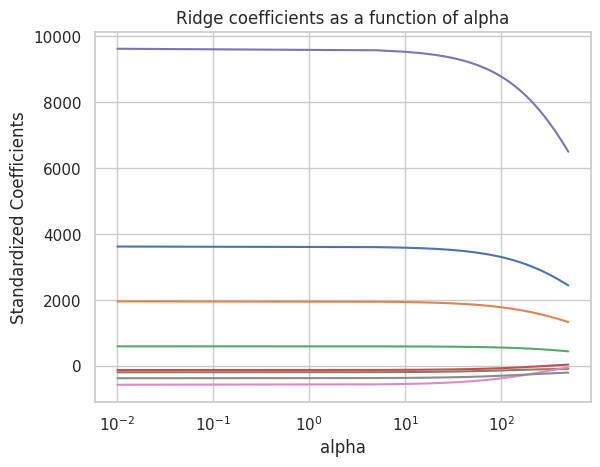

In [248]:
#Ridge regression
ridge_alphas = np.linspace(0.01,500,100,150)   #penalty parameter
ridge = Ridge(max_iter=10000)
coefs = []
for a in ridge_alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha')

the coeffecients in ridge tend to decrease to zero but never really becomes zero as you keep increase the penalty parameter.

In [250]:
#prediction for ridge regression
y_pred = ridge.predict((X_test))
lin_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
lin_ridge

6578.303917107746

Question- Part 2

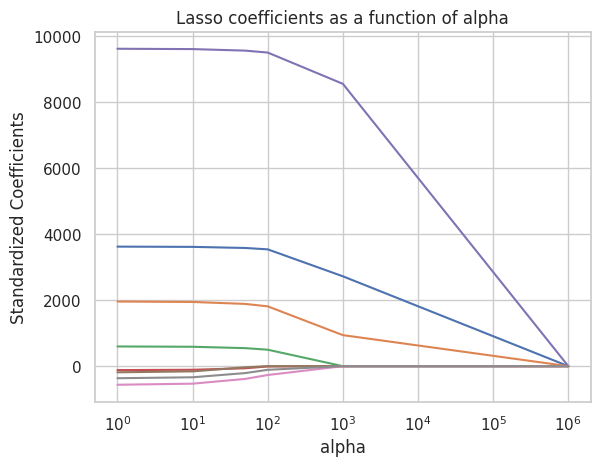

In [251]:
#lasso
alphas = [1,10,50,100,1000,1000000]
lasso = Lasso(max_iter=10000)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

All the coeffecients in lasso regression tends to converge to zero when you keep increasing the penalty.

In [253]:
#prediction for lasso regression
y_pred = lasso.predict(X_test)
lin_lasso = np.sqrt(mean_squared_error(y_test,y_pred))
lin_lasso

12146.539891180542

Question-E Part 2

In [254]:
#elastic net
param_grid = {'alpha': [0.1, 0.01, 0.001], 'l1_ratio': [ 0.5, 0.2]}
enet = ElasticNet()
enet_cv = GridSearchCV(enet, param_grid, scoring='neg_mean_squared_error', cv=4, verbose=-5)
enet_cv.fit(X_train, y_train)
params_optimal_enet = enet_cv.best_params_
print("\n\nBest Score (root mean squared error): %f" % np.sqrt(-enet_cv.best_score_))
print("\n\nOptimal Hyperparameter Values: ", params_optimal_enet)
print("\n")



Best Score (root mean squared error): 6207.194079


Optimal Hyperparameter Values:  {'alpha': 0.01, 'l1_ratio': 0.5}




Question-E Part 1

In [244]:
#SGD
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
cv_score = cross_val_score(sgd_reg, X_train, y_train, cv = 4)
print("CV mean score: ", np.sqrt(cv_score.mean()))

CV mean score:  0.8743263024957203


In [267]:
#sgd prediction
y_pred = sgd_reg.predict(X_test)
sgd_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Question-E Part 3

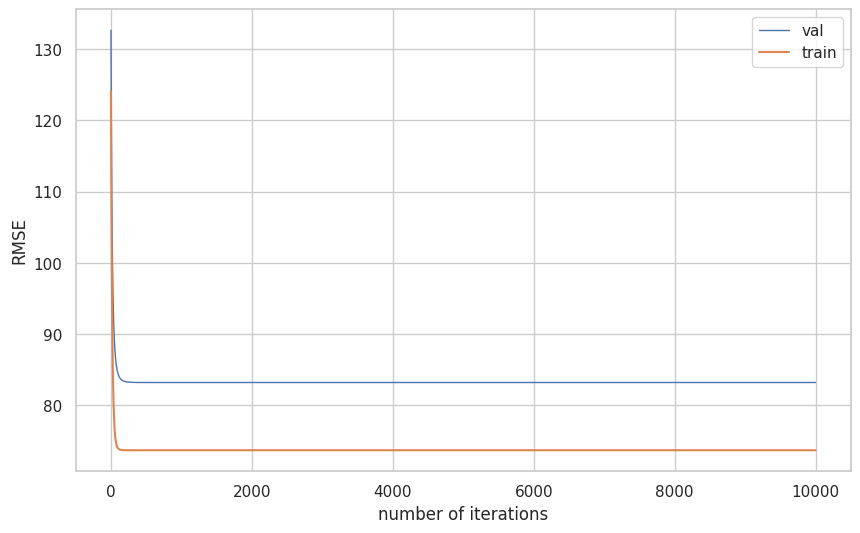

In [229]:
# SGD for incremental epochs
#split the train into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
lin_reg_sgd = SGDRegressor(eta0=0.001, random_state=42)
n_epochs =10000
mse_train_list, mse_validation_list = [], []
for i in range(n_epochs):
  lin_reg_sgd.partial_fit(X_train, y_train)
  y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
  y_valid_predicted_sgd = lin_reg_sgd.predict(X_valid)
  train_score = np.sqrt(mean_squared_error(y_train,y_train_predicted_sgd,squared=False))
  valid_score = np.sqrt(mean_squared_error(y_valid,y_valid_predicted_sgd,squared=False))
  mse_train_list.append(train_score)
  mse_validation_list.append(valid_score)

# Plot RMSE values for varying
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(n_epochs)], mse_validation_list,linewidth=1.0, label="Validation RMSE")
plt.plot([i for i in range(n_epochs)], mse_train_list,label="Train RMSE")
plt.legend(['val','train'], loc='upper right')
plt.xlabel("number of iterations")
plt.ylabel("RMSE")
plt.show()



After certain number of epochs, the validation and training loss becomes constant, validation loss being higher than training loss.

This looks like a proper fit to the model.

Question-E Part 3

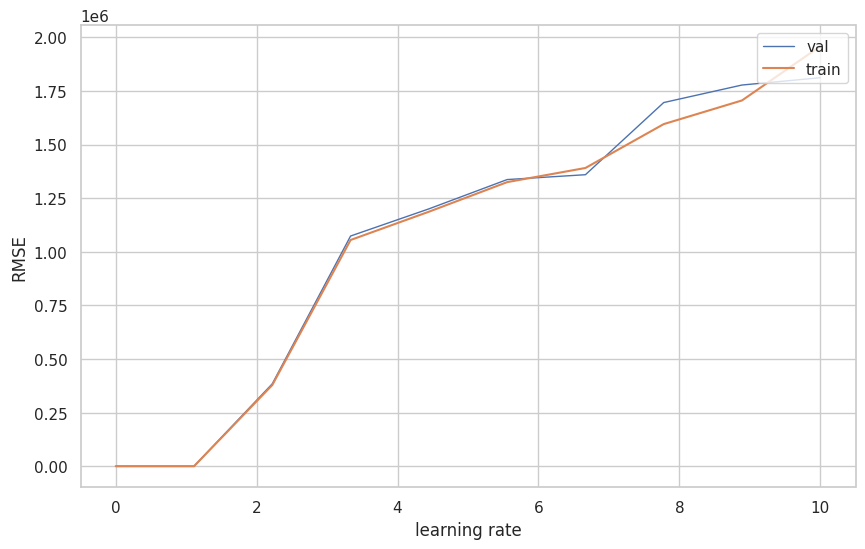

In [230]:
# SGD for various learning rate
#split the train into train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle = True,test_size=0.2, random_state=42)
mse_train_list, mse_validation_list = [], []
learning_rate = np.linspace(0.001,10,10)
for i in learning_rate:
  lin_reg_sgd = SGDRegressor(eta0=i, random_state=42)
  lin_reg_sgd.fit(X_train, y_train)
  y_train_predicted_sgd = lin_reg_sgd.predict(X_train)
  y_valid_predicted_sgd = lin_reg_sgd.predict(X_valid)
  train_score = np.sqrt(mean_squared_error(y_train,y_train_predicted_sgd,squared=False))
  valid_score = np.sqrt(mean_squared_error(y_valid,y_valid_predicted_sgd,squared=False))
  mse_train_list.append(train_score)
  mse_validation_list.append(valid_score)

# Plot RMSE values for varying
plt.figure(figsize=(10, 6))
plt.plot([i for i in learning_rate], mse_validation_list,linewidth=1.0, label="Validation RMSE")
plt.plot([i for i in learning_rate], mse_train_list,label="Train RMSE")
plt.legend(['val','train'], loc='upper right')
plt.xlabel("learning rate")
plt.ylabel("RMSE")
plt.show()

As you increase the learning rate, so does the models RMSE

Question-F Part 1

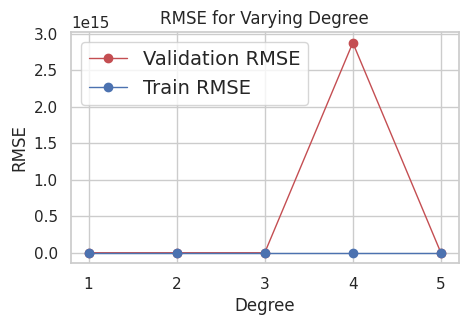

In [232]:
#Polynomial linear regression
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
degreeList = [1,2,3,4,5]
for degree in degreeList:
   # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(np.sqrt(mean_squared_error(y_train_new, y_train_predicted)))
    mse_validation_list.append(np.sqrt(mean_squared_error(y_validation, y_validation_predicted)))
# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(degreeList, mse_validation_list, "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(degreeList, mse_train_list, "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Degree")
plt.show()

In [273]:
#prediction for polynomial regression
y_pred = model.predict(X_test)
poly_lin_reg = np.sqrt(mean_squared_error(y_test,y_pred))
poly_lin_reg

4612.423594126391

Question-F Part 2

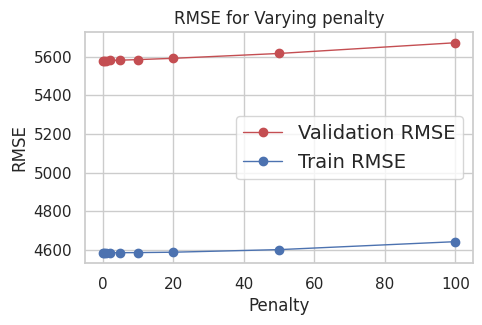

In [261]:
#Polynomial linear regression with ridge regularization
ridge = [0.1,0.5, 1,2, 5, 10,20, 50,100]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in ridge:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(2, include_bias=False), Ridge(alpha = a,max_iter=10000))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(mean_squared_error(y_train_new, y_train_predicted))
    mse_validation_list.append(mean_squared_error(y_validation, y_validation_predicted))

# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(ridge, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(ridge, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty")
plt.ylabel("RMSE")
plt.title("RMSE for Varying penalty")
plt.show()

an underfit model as difference between training and valdiation accuracy is huge.

In [262]:
#prediction for polynomial ridge regularization
y_pred = model.predict(X_test)
poly_lin_ridge = np.sqrt(mean_squared_error(y_test,y_pred))
poly_lin_ridge

4612.423594126391

Question-F Part 2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.354e+09, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.885e+09, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.448e+09, tolerance: 1.216e

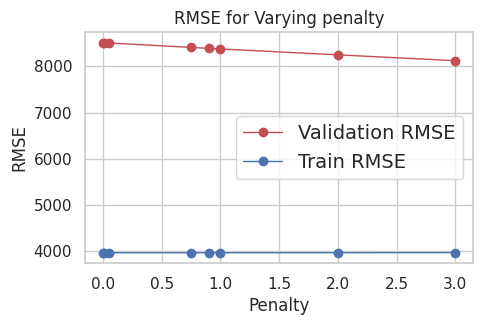

In [279]:
#Polynomial linear regression with lasso regularization
alpha = [0.001,0.01,0.05,0.75,0.9,1,2,3 ]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in alpha:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(4, include_bias=False), Lasso(alpha = a,max_iter=10000))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(mean_squared_error(y_train_new, y_train_predicted))
    mse_validation_list.append(mean_squared_error(y_validation, y_validation_predicted))
# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(alpha, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(alpha, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty")
plt.ylabel("RMSE")
plt.title("RMSE for Varying penalty")
plt.show()

In [278]:
#prediction for polynomial lasso regularization
y_pred = model.predict(X_test)
poly_lin_lasso = np.sqrt(mean_squared_error(y_test,y_pred))
poly_lin_lasso

4612.423594126391

Question-F Part 1

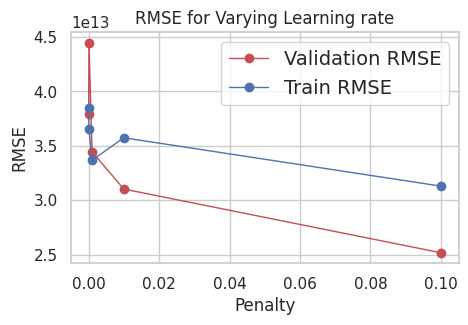

In [238]:
#Polynomial linear regression with SGD
learning_rate = [0.00001,0.0001,0.001,0.01,0.1 ]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in learning_rate:
    # Create a pipeline object: first add polynomials, then standardize, finally create Linear Regression model
    model = make_pipeline(PolynomialFeatures(2, include_bias=False),SGDRegressor(eta0=i))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(mean_squared_error(y_train_new, y_train_predicted))
    mse_validation_list.append(mean_squared_error(y_validation, y_validation_predicted))
# Plot RMSE values for varying polynomial degree
plt.figure(figsize=(5, 3))
plt.plot(learning_rate, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(learning_rate, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty")
plt.ylabel("RMSE")
plt.title("RMSE for Varying Learning rate")
plt.show()

The rmse decrease for a certain penalty but abruptly increase as you keep increasing.

Question-F Part 2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.202e+09, tolerance: 1.216e+07
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'RMSE for Varying penalty (alpha)')

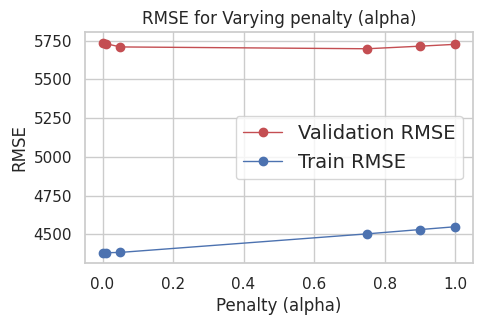

In [256]:
# Polynomial linear regression with ElasticNet regularization
alpha = [0.001, 0.01, 0.05, 0.75, 0.9, 1]
coefs = []
# Partition the training data into train and validation subsets for this experiment
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Two lists to store train and validation MSE values for various models of varying complexity
mse_train_list, mse_validation_list = [], []
for a in alpha:
    # Create a pipeline object: first add polynomials, then standardize, finally create ElasticNet Regression model
    model = make_pipeline(PolynomialFeatures(3, include_bias=False), ElasticNet(alpha=a, l1_ratio=0.5, max_iter=10000))
    # Train the model
    model.fit(X_train_new, y_train_new)
    # Make prediction
    y_train_predicted = model.predict(X_train_new)
    y_validation_predicted = model.predict(X_validation)
    # Compute MSE and add to the list
    mse_train_list.append(mean_squared_error(y_train_new, y_train_predicted))
    mse_validation_list.append(mean_squared_error(y_validation, y_validation_predicted))
# Plot RMSE values for varying penalty (alpha)
plt.figure(figsize=(5, 3))
plt.plot(alpha, np.sqrt(mse_validation_list), "ro-", alpha=1.0, linewidth=1.0, label="Validation RMSE")
plt.plot(alpha, np.sqrt(mse_train_list), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.legend(loc="best", fontsize=14)
plt.xlabel("Penalty (alpha)")
plt.ylabel("RMSE")
plt.title("RMSE for Varying penalty (alpha)")

Both validation and train rmse increase as we increase the alpha fro 0.01 to 1

In [257]:
#prediction for polynomial lasso regularization
y_pred = model.predict(X_test)
poly_lin_enet = np.sqrt(mean_squared_error(y_test,y_pred))

Question-F Part 2

In [240]:
# Create Elastic Net linear regression object using the optimal hyperparameter values
lin_reg_enet = ElasticNet(**params_optimal_enet)
# Train the model
lin_reg_enet.fit(X_train, y_train)
print("Number of Iterations: \n", lin_reg_enet.n_iter_)
print("\n----------------------------- Model Evaluation -----------------------------")
# Make prediction
y_train_predicted_enet = lin_reg_enet.predict(X_train)
print("Training: root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_train, y_train_predicted_enet)))
# Scoring Parameter for Regression:
scores = -(cross_val_score(lin_reg_enet, X_train, y_train, scoring='neg_mean_squared_error', cv=10))
print(np.sqrt(scores))

print("\nTraining: Root Mean Squared Error: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# Make prediction using the test data
y_test_predicted = lin_reg_enet.predict(X_test)
print("Test: Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_predicted)))

Number of Iterations: 
 21

----------------------------- Model Evaluation -----------------------------
Training: root Mean squared error: 5566.34
[5151.2861437  7729.26260507 4275.1349114  5704.2029763  6064.58488237
 5163.37443675 6806.97486142 7165.2113899  3555.09211686 5201.23272343]

Training: Root Mean Squared Error: 33789824.77 (+/- 28186892.08)
Test: Root Mean squared error: 5621.89


G Part 1 : Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]

In [239]:
y_pred = model.predict(X_test)
poly_lin_sgd = np.sqrt(mean_squared_error(y_test,y_pred))

Question-E Part 3

In [258]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'alpha': [0.1, 0.01,0.001],
              'l1_ratio': [1,0.2,0.5], 'max_iter':[100, 500],'eta0': [0.01, 0.001],
              'loss': ['squared_error']}
sgd = SGDRegressor(penalty='elasticnet')
sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_absolute_error', cv=4, verbose=1, n_jobs=-1)
sgd_cv.fit(X_train, y_train)
params_optimal_sgd = sgd_cv.best_params_
print("Best Score (negative mean squared error): %f" % np.sqrt(-sgd_cv.best_score_))
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")
y_pred=sgd_cv.predict(X_test)
sgd_hyper_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best Score (negative mean squared error): 65.062839
Optimal Hyperparameter Values:  {'alpha': 0.001, 'eta0': 0.01, 'l1_ratio': 1, 'loss': 'squared_error', 'max_iter': 100}




Question-E Part 3

In [208]:
# Create Elestic Net linear regression object using the optimal hyperparameter values
lin_reg_enet = ElasticNet(**params_optimal_enet)
# Train the model
lin_reg_enet.fit(X_train, y_train)
# Make prediction
y_train_predicted_enet = lin_reg_enet.predict(X_train)
print("Training: Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_train, y_train_predicted_enet)))
# Scoring Parameter for Regression:
scores = cross_val_score(lin_reg_enet, X_train, y_train, scoring='neg_mean_squared_error', cv=2)
print("\n Training: root Mean Squared Error: %0.2f " % (np.sqrt(-scores.mean())))
# Make prediction using the test data
y_test_predicted = lin_reg_enet.predict(X_test)
print("Test: root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_test_predicted)))

Training: Mean squared error: 6155.09

 Training: root Mean Squared Error: 6194.60 
Test: root Mean squared error: 5581.45


Question-G Part -1

 All these values are calculated below the trained models

In [281]:
score_names= ['lin_reg', 'ridge_reg', 'lasso_reg', 'sgd_rmse', 'poly_reg',
       'poly_lin_ridge', 'poly_reg_lasso', 'poly_reg_enet', 'poly_reg_sgd']
scores =[lin_reg_score, lin_ridge, lin_lasso, sgd_rmse, poly_lin_reg, poly_lin_ridge,poly_lin_lasso,poly_lin_enet,sgd_hyper_rmse]

Question-G Part -2

In [282]:
df_score = pd.DataFrame(data = [score_names,scores])
df_score

,0,1,2,3,4,5,6,7,8
0,lin_reg,ridge_reg,lasso_reg,sgd_rmse,poly_reg,poly_lin_ridge,poly_reg_lasso,poly_reg_enet,poly_reg_sgd
1,6203.220916,6578.303917,12146.539891,5607.560011,4612.423594,4612.423594,4612.423594,4697.971099,5578.33916


Summary:
1. One can see that polynomial regression of a linear model performs better when compared to other models, primarily because of the non-linearity in this particular dataset.

2. The reason why i have chosen RMSE as the metric is because of the distribution of the target variable, which is normal as you've seen in the plots.

3. With proper hyper parameter tuning, one can expect better performance with sgd compared to the polynomial regression.

4. One can perform certain transformations such as log transformation, squared transformation etc to make the distribution more linear, which can significantly improve the performance of the model.